<a href="https://colab.research.google.com/github/joseph444/ml-algos/blob/master/Placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#importing datasets

In [2]:
dataset=pd.read_csv("/Placement_Data_Full_Class.csv")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#Diving into X and Y

In [3]:
X=dataset.iloc[:,1:-2].values
Y=dataset.iloc[:,-2].values

Checking all the categorical data in dataset to implement proper encoding

In [4]:
print("Unque in Gender column")
print(dataset['gender'].unique())
print("------------------------------------------------------------------------")
print("Unique in ssc_b")
print(dataset['ssc_b'].unique())
print("------------------------------------------------------------------------")
print("Unique in hsc_b")
print(dataset['hsc_b'].unique())
print("------------------------------------------------------------------------")
print("Unique in hsc_s")
print(dataset['hsc_s'].unique())
print("------------------------------------------------------------------------")
print("Unique in degree_t")
print(dataset['degree_t'].unique())
print("------------------------------------------------------------------------")
print("Unique in spec")
print(dataset['specialisation'].unique())

#creating Dictonary containing this unique values
Gender={
    'M':1,
    'F':2
}
sc_b={
    'Others':1,
    'Central':2
}
sc_c={
    'Commerce':1,
    'Science':2,
    'Arts':3
}
degree_t={
    'Sci&Tech':1,
    'Comm&Mgmt':2,
    'Others':3
}
spec={
    'Mkt&HR':1,
    'Mkt&Fin':2
}
yes_no={
    'Yes':1,
    'No':0,
    'Placed':1,
    'Not Placed':0
}
def encode_categorical_data(X):
    X[:,0]=np.array([Gender[i] for i in X[:,0]])
    X[:,2]=np.array([sc_b[i] for i in X[:,2]])
    X[:,4]=np.array([sc_b[i] for i in X[:,4]])
    X[:,5]=np.array([sc_c[i] for i in X[:,5]])
    X[:,7]=np.array([degree_t[i] for i in X[:,7]])
    X[:,8]=np.array([yes_no[i] for i in X[:,8]])
    X[:,10]=np.array([spec[i] for i in X[:,10]])
    return X
    pass
        
 
X[:4,:]

Unque in Gender column
['M' 'F']
------------------------------------------------------------------------
Unique in ssc_b
['Others' 'Central']
------------------------------------------------------------------------
Unique in hsc_b
['Others' 'Central']
------------------------------------------------------------------------
Unique in hsc_s
['Commerce' 'Science' 'Arts']
------------------------------------------------------------------------
Unique in degree_t
['Sci&Tech' 'Comm&Mgmt' 'Others']
------------------------------------------------------------------------
Unique in spec
['Mkt&HR' 'Mkt&Fin']


array([['M', 67.0, 'Others', 91.0, 'Others', 'Commerce', 58.0,
        'Sci&Tech', 'No', 55.0, 'Mkt&HR', 58.8],
       ['M', 79.33, 'Central', 78.33, 'Others', 'Science', 77.48,
        'Sci&Tech', 'Yes', 86.5, 'Mkt&Fin', 66.28],
       ['M', 65.0, 'Central', 68.0, 'Central', 'Arts', 64.0, 'Comm&Mgmt',
        'No', 75.0, 'Mkt&Fin', 57.8],
       ['M', 56.0, 'Central', 52.0, 'Central', 'Science', 52.0,
        'Sci&Tech', 'No', 66.0, 'Mkt&HR', 59.43]], dtype=object)

In [5]:
X=encode_categorical_data(X)

In [6]:
Y=Y.reshape((Y.shape[0],1))

In [7]:
Y[:,0]=np.array([yes_no[i] for i in Y[:,0]])
Y=Y.flatten().astype(int)
Y[:5]

array([1, 1, 1, 0, 1])

#Standard Scaling the X

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

#Spliting the Dataset

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)


#Creating and Training the model

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)
ypred=classifier.predict(xtest)


In [11]:
print(round(classifier.score(xtest,ytest)*100,2),"%")

90.74 %


In [12]:
class LogisticRegressionDD:
      @staticmethod
      def sigmoid(x):
          """
          x: an numpy array
          returns the result as an array
          """
          return 1/(1+np.exp(-x))
      
      @staticmethod
      def net_input(theta,x):
          return np.dot(x,theta)

      def probability(self,x,theta):
          return self.sigmoid(self.net_input(theta,x))
    
      def cost(self,theta,x,y):
          """
          Computes the cost of the Logistic regression
          x: is the array of independentVariable
          y: is the array of dependent variable
          theta is the coeffiecnet matrix
          m is the no of samples
          returns the cost of the current classification
          """
          m=x.shape[0]
          p1=-(1/m)
          q1=y*np.log(self.probability(x,theta))+(1-y)*np.log(1-self.probability(x,theta))
          p2=np.sum(q1)
          total_cost= p1*p2
          return total_cost
      
      def gradient(self,theta,x,y):
          """
          Calculates the gradient of the cost function
          x: is the array of independentVariable
          y: is the array of dependent variable
          theta is the coeffiecnet matrix
          m is the no of samples
          returns the local minima of the current cost function
          """
          m=x.shape[0]
          dj=(1/m)*np.dot(x.T,(self.sigmoid(self.net_input(theta,x))-y))
          return dj
      def getTheta(self,x,y):
          """
          calculates the regressional coefficient 
          x: the array of independent variables
          y: the array of dependent variables
          returns Theta
          """
          p1=np.linalg.inv(np.dot(x.T,x))
          p2=np.dot(x.T,y)
          theta=np.dot(p1,p2)
          return theta
     


      def fit(self,x,y):
          """
          we will fetch the minima of the cost for the provided x and y and then tracing back to the weight fo the variables will give us the reqired values
          """
          from scipy.optimize import fmin_tnc
          ones=np.ones((x.shape[0],1))
          X=np.hstack((ones,x))
          y=y[:,np.newaxis]
          theta=np.zeros((X.shape[1],1))
          m=y.shape[0]
          self.weight=fmin_tnc(func=self.cost,x0=theta,fprime=self.gradient,args=(X,y.flatten()))[0]
      
      def predict(self,x):
          theta=self.weight[:,np.newaxis]
          ones=np.ones((x.shape[0],1))
          X=np.hstack((ones,x))
          return self.probability(X,theta)
      def accuracy(self,x,y,threshold=0.5):
          predicted_class=(self.predict(x)>=threshold).astype(int)
          predicted_class=predicted_class.flatten()
          actual_class=(y>=threshold).astype(int)
          actual_class=actual_class.flatten()
          accuracy=np.mean(predicted_class==actual_class)
          return accuracy*100


In [13]:
regressor=LogisticRegressionDD()
regressor.fit(X,Y)
ypred=regressor.predict(xtest)
print(round(regressor.accuracy(xtest,ytest,3)),"%")

100.0 %


#Graphs

In [14]:
x=np.array([np.mean(i) for i in X])
placedy=[]
not_placedy=[]
placedx=[]
not_placedx=[]
for i,c in enumerate(x):
    if Y[i]==1:
      placedy.append(Y[i])
      placedx.append(c)
    else:
      not_placedy.append(Y[i])
      not_placedx.append(c)
      pass

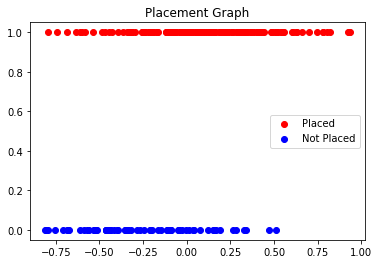

In [15]:
plt.title("Placement Graph")
plt.scatter(placedx,placedy,color="red",label="Placed")
plt.scatter(not_placedx,not_placedy,color="blue",label="Not Placed")
plt.legend()
plt.show()

#Function which takes An Array as X and Then gives the result as if the person is placed or not


In [71]:
def Predict_the_placement(x):
    X=encode_categorical_data(x)
    X=sc.fit_transform(X)
    ypred1=classifier.predict(X).astype(float)
    ypred2=(regressor.predict(X)).reshape((x.shape[0],))
    ypred1=np.array(["placed" if x==1 else "not placed" for x in ypred1])
    ypred2=np.array(["placed" if x>=0.6 else "not placed" for x in ypred2])
    return ypred1,ypred2


In [72]:
test=np.array([['M', 57.0, 'Others', 91.0, 'Others', 'Science', 58.0,
        'Sci&Tech', 'No', 55.0, 'Mkt&Fin', 58.8],
       ['M', 79.33, 'Central', 78.33, 'Others', 'Science', 77.48,
        'Sci&Tech', 'Yes', 86.5, 'Mkt&Fin', 66.28],
       ['M', 65.0, 'Central', 68.0, 'Central', 'Arts', 64.0, 'Comm&Mgmt',
        'Yes', 75.0, 'Mkt&Fin', 57.8]])

Predict_the_placement(test)

(array(['not placed', 'placed', 'placed'], dtype='<U10'),
 array(['not placed', 'placed', 'placed'], dtype='<U10'))